## Histone deacetylase 1 - part 3 (rule aggregation)

### Import libraries

In [1]:
import pandas as pd

### Read in the datasets

In [2]:
df = pd.read_csv('hdac1_inhibitors_stripped.csv')
df_pairs = pd.read_csv('hdac1_inhibitors_pairs.csv')

### Copy logD values over to 'pCHEMBL Value' column for later comparison.

In [3]:
df_exact = df[['stripped_smiles', 'assay_chembl_id', 'standard_type', 'standard_relation', 'standard_value', 'standard_units', 'pchembl_value']].copy()
df_exact['pchembl_value'] = df_exact.apply(lambda x: x['standard_value'] if x['standard_type'] == 'LogD' else x['pchembl_value'], axis=1)

### Filter exact measurements only.

In [4]:
df_exact = df_exact[(df_exact['standard_relation']=="=") & (pd.notna(df_exact['pchembl_value']))]
df_exact.sample(3).transpose()

,55,77,60
stripped_smiles,CCN1CCN(Cc2cnc(-c3ccc(C(=O)Nc4ccccc4N)cc3)c(Cl...,Cc1cc(CN2CCN(C(C)C)CC2)cnc1-c1ccc(C(=O)Nc2cccc...,CCN1CCN(Cc2cnc(-c3ccc(C(=O)Nc4ccccc4N)cc3)c(C)...
assay_chembl_id,CHEMBL927948,CHEMBL927948,CHEMBL927949
standard_type,IC50,IC50,IC50
standard_relation,=,=,=
standard_value,16.22,19.05,229.09
standard_units,nM,nM,nM
pchembl_value,7.79,7.72,6.64


### Combine twice with confirmed molecular pairs.

In [5]:
df_merge = df_pairs.merge(df_exact, left_on='smiles1', right_on='stripped_smiles')
df_merge = df_merge.merge(df_exact, left_on=['smiles2', 'assay_chembl_id'], right_on=['stripped_smiles', 'assay_chembl_id'])
df_merge['pchembl_value_delta'] = df_merge['pchembl_value_y'] - df_merge['pchembl_value_x'] 
df_merge.sample(3).transpose()

,763,422,31
smiles1,CC(C)N1CCN(Cc2cnc(-c3ccc(C(=O)Nc4ccccc4N)cc3)c...,CC(C)N1CCN(Cc2cnc(-c3ccc(C(=O)Nc4ccccc4N)cc3)c...,CCN1CCN(Cc2cnc(-c3ccc(C(=O)Nc4ccccc4N)cc3)c(C)...
smiles2,Nc1ccccc1NC(=O)c1ccc(-c2ncc(CN3CCC3)cc2F)cc1,CC(C)N1CCN(Cc2cnc(-c3ccc(C(=O)Nc4ccccc4N)cc3)c...,N#Cc1cccnc1-c1ccc(C(=O)Nc2ccccc2N)cc1
percentmcs,0.787879,0.941176,0.65625
radius,3,3,1
valid,True,True,True
smirks,[#6](-[#6](-[#6](-[H])(-[H])-[H])(-[#7]1-[#6](...,[#6:16]:[#6:25](:[#6:24](:[#6:5](:[#7:27])-[#6...,[#6](-[#6](-[#7]1-[#6](-[#6](-[#7](-[#6](-[#6:...
fragment1,[cH3]-[c]([nH])[c]([Cl])[cH][cH][CH2][N]1[CH2]...,[cH2][cH][c]([C]#[N])[c](-[cH3])[nH],[cH2][c]([cH][cH][CH3])[CH2][N]1[CH2][CH2][N](...
fragment2,[cH3]-[c]([nH])[c]([F])[cH][cH][CH2][N]1[CH2][...,[cH2][cH][c]([F])[c](-[cH3])[nH],[cH2][cH][cH][cH][C]#[N]
stripped_smiles_x,CC(C)N1CCN(Cc2cnc(-c3ccc(C(=O)Nc4ccccc4N)cc3)c...,CC(C)N1CCN(Cc2cnc(-c3ccc(C(=O)Nc4ccccc4N)cc3)c...,CCN1CCN(Cc2cnc(-c3ccc(C(=O)Nc4ccccc4N)cc3)c(C)...
assay_chembl_id,CHEMBL927948,CHEMBL927948,CHEMBL927952


### Filter mcs > 90% and aggregate by the two fragments.

In [10]:
df_agg = df_merge[(df_merge.percentmcs > 0.9) & (df_merge.radius == 3)]
df_agg = pd.pivot_table(df_agg, values='pchembl_value_delta', index=['fragment1', 'fragment2'], columns='assay_chembl_id', aggfunc=['count','mean'])
df_agg.columns = [' '.join(col).strip() for col in df_agg.columns.values]
df_agg

count CHEMBL927948  \
fragment1                                 fragment2                                                       
[CH3][CH2][N]([CH2][CH3])[CH2][CH3]       [CH3][CH2][N]([CH2][CH3])[CH]([CH3])[CH3]                 3.0   
[CH3][CH2][N]([CH2][CH3])[CH]([CH3])[CH3] [CH3][CH2][N]([CH2][CH3])[CH2][CH3]                       3.0   
[cH2][cH][c]([CH3])[c](-[cH3])[nH]        [cH2][cH][c]([C]#[N])[c](-[cH3])[nH]                      3.0   
                                          [cH2][cH][c]([Cl])[c](-[cH3])[nH]                         2.0   
                                          [cH2][cH][c]([F])[c](-[cH3])[nH]                          2.0   
[cH2][cH][c]([C]#[N])[c](-[cH3])[nH]      [cH2][cH][c]([CH3])[c](-[cH3])[nH]                        3.0   
                                          [cH2][cH][c]([Cl])[c](-[cH3])[nH]                         2.0   
                                          [cH2][cH][c]([F])[c](-[cH3])[nH]                          2.0   
[cH2][cH][c]([Cl])[c](-[cH3])[nH]         [cH2][cH][c]([CH3])[c](-[cH3])[nH]                        2.0   
                                          [cH2][cH][c]([C]#[N])[c](-[cH3])[nH]                      2.0   
                                          [cH2][cH][c]([F])[c](-[cH3])[nH]                          1.0   
[cH2][cH][c]([F])[c](-[cH3])[nH]          [cH2][cH][c]([CH3])[c](-[cH3])[nH]                        2.0   
                                          [cH2][cH][c]([C]#[N])[c](-[cH3])[nH]                      2.0   
                                          [cH2][cH][c]([Cl])[c](-[cH3])[nH]                         1.0   

                                                                                     count CHEMBL927949  \
fragment1                                 fragment2                                                       
[CH3][CH2][N]([CH2][CH3])[CH2][CH3]       [CH3][CH2][N]([CH2][CH3])[CH]([CH3])[CH3]                 3.0   
[CH3][CH2][N]([CH2][CH3])[CH]([CH3])[CH3] [CH3][CH2][N]([CH2][CH3])[CH2][CH3]                       3.0   
[cH2][cH][c]([CH3])[c](-[cH3])[nH]        [cH2][cH][c]([C]#[N])[c](-[cH3])[nH]                      3.0   
                                          [cH2][cH][c]([Cl])[c](-[cH3])[nH]                         2.0   
                                          [cH2][cH][c]([F])[c](-[cH3])[nH]                          2.0   
[cH2][cH][c]([C]#[N])[c](-[cH3])[nH]      [cH2][cH][c]([CH3])[c](-[cH3])[nH]                        3.0   
                                          [cH2][cH][c]([Cl])[c](-[cH3])[nH]                         2.0   
                                          [cH2][cH][c]([F])[c](-[cH3])[nH]                          2.0   
[cH2][cH][c]([Cl])[c](-[cH3])[nH]         [cH2][cH][c]([CH3])[c](-[cH3])[nH]                        2.0   
                                          [cH2][cH][c]([C]#[N])[c](-[cH3])[nH]                      2.0   
                                          [cH2][cH][c]([F])[c](-[cH3])[nH]                          1.0   
[cH2][cH][c]([F])[c](-[cH3])[nH]          [cH2][cH][c]([CH3])[c](-[cH3])[nH]                        2.0   
                                          [cH2][cH][c]([C]#[N])[c](-[cH3])[nH]                      2.0   
                                          [cH2][cH][c]([Cl])[c](-[cH3])[nH]                         1.0   

                                                                                     count CHEMBL927950  \
fragment1                                 fragment2                                                       
[CH3][CH2][N]([CH2][CH3])[CH2][CH3]       [CH3][CH2][N]([CH2][CH3])[CH]([CH3])[CH3]                 1.0   
[CH3][CH2][N]([CH2][CH3])[CH]([CH3])[CH3] [CH3][CH2][N]([CH2][CH3])[CH2][CH3]                       1.0   
[cH2][cH][c]([CH3])[c](-[cH3])[nH]        [cH2][cH][c]([C]#[N])[c](-[cH3])[nH]                      NaN   
                                          [cH2][cH][c]([Cl])[c](-[cH3])[nH]                         NaN   
                 

### ...and finally plot (figure 3 from wizepairz paper)

In [11]:
%matplotlib inline

<AxesSubplot:xlabel='mean CHEMBL927952', ylabel='mean CHEMBL927948'>

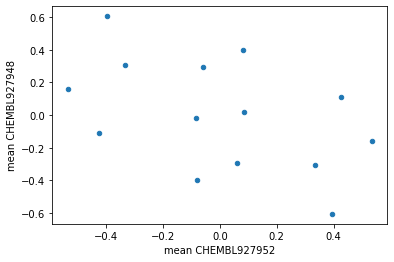

In [12]:
df_agg.plot.scatter('mean CHEMBL927952', 'mean CHEMBL927948')